# 04 - Inversion of z-transform and the z-space
Lecture 04 - 21 September 2021

As a starting point, this lecture will provide some examples regarding the inversion of the z-transform:

## Examples of z-transform inversion

### The delta
Let's take $x(z)=1$; $ROC=\mathcal{C}$:
\begin{align*}
    x[n]=\frac{1}{2\pi i} \oint_{\Gamma um 0}z^{n-1}dz = \delta_{n-1, -1} = \delta_{n,0} = \delta[n]
\end{align*}

### A Rational function
$X(z)=\frac{z}{z-a}$, $ROC:\{z: |z|<a\}$
\begin{align*}
    x[n]=\frac{1}{2\pi i} \oint_{\Gamma um 0} \frac{z}{z-a} z^{n-1}dz = \frac{1}{2\pi i} \oint_{\Gamma um 0} \frac{z^n}{z-a}dz
\end{align*}  
As stated by the ROC, $\Gamma$ must be chosen so that it DOES not enclose $a$.
![Gamma must be chosen so that it does not enclose a. There are two cases.](images/21-09-21_gamma_example1.jpg)

At this point there are two subcases to handle depending on the value of n:  
1. If $n\geq 0$: there a NO OTHER POLES and the integral is 0
2. If $n<0$: there is a pole of order $|n|$ in the origin. By using the lemma proved in the previous lecture and choosing $m=-n$ we have:  
\begin{align*}
        x[n]&=\frac{1}{(m-1)!}\left[ \frac{d^{m-1}}{dz^{m-1}} \frac{z^{-m}}{z-a}z^{m} \right]_{z=0} = \frac{1}{(m-1)!}\left[ \frac{d^{m-1}}{dz^{m-1}} \frac{1}{z-a} \right]_{z=0} \\
        &= \frac{1}{(m-1)!}\left[ (m-1)! (-1)^{m-1} (z-a)^{-m} \right]_{z=0} = (-1)^{m-1} (-a)^{-m} = - a^{-m} = -a^{n} \text{ with } n<0
\end{align*}

So that the final result is, by combining the two cases, $x[n]=-U[-n-1]a^n$.

### Same rational function, different ROC
Let's consider again the same rational function but with a different ROC: $X(z)=\frac{z}{z-a}$, $ROC:\{z: |z|>a\}$. This time there is NO WAY to avoid the pole in $a$. Thanks to the [residue theorem](https://en.wikipedia.org/wiki/Residue_theorem) the contributions from the poles can be separated:
\begin{align*}
    x[n] = \frac{1}{2\pi i} \oint_{\Gamma um 0} \frac{z^n}{z-a}dz = -a^n U[-n-1] + \text{ pole in a }
\end{align*}

**pole in a** (the order is $m=1$):

\begin{align*}
    \frac{1}{(m-1)!}\left[ \frac{d^{m-1}}{dz^{m-1}} \frac{z^{n}}{z-a}(z-a)^{m} \right]_{z=a} = \frac{1}{0!}\left[ \frac{d^{0}}{dz^{0}} \frac{z^{n}}{z-a}(z-a)^{1} \right]_{z=a} = a^n
\end{align*}

Summing up: $x[n]=a^{n}(1-U[-n-1]) = U[n]a^n$.


### Poisson process
A [poisson process](https://en.wikipedia.org/wiki/Poisson_point_process) is a process where the probability of an event in an interval $dt$ is given by $dP=\Gamma dt$ and no more than one event can happen in the same time interval. Let's now define $P(n, t)$ as the probability of having $n$ events in an interval $[0, t]$. At time $t=0$ no events can occur and $P(n, t=0)=\delta_{n,0}$.

![Poisson process on an interval](images/21-09-21_poisson_process.jpg)

If one considers a slightly bigger interval $[0, t+dt]$, still with $n$ occurrence, the two probabilities are linked via

\begin{align*}
    P(n, t+dt) = P(n,t)(1-\Gamma dt) + P(n-1, t) \Gamma dt
\end{align*}

That is, the probability that in $[0, t]$ happend $n-1$ events and the $n-th$ event happend in the interval $[t, t+dt]$ plus the probability that $n$ events already happened in $[0, t]$ and no new event happend in $[t, t+dt]$.  
Let's write the probability as a difference equation and consider the limit $dt\rightarrow0$:

\begin{align*}
    \frac{P(n, t+dt) - P(n, t)}{dt} = \Gamma \left[ P(n-1, t) - p(n, t) \right] \implies \frac{dP(n, t)}{dt} = \Gamma \left[ P(n-1, t) - P(n, t) \right]
\end{align*}

By applying the z-transform $\left( \Pi(z,t)=Z\left\{ P(n, t) \right\} \right)$ and solving the differential equation in the $z-space$:

\begin{align*}
    \Pi(z,t) &= \sum_{n} z^{-n} P(n,t) \implies \frac{d\Pi(z,t)}{dt} = \Gamma \left[ \frac{\Pi(z,t)}{z}-\Pi(z,t) \right] = \Gamma\Pi(z,t) \left( \frac{1}{z}-1\right)\\
    &\implies \Pi(z,t) = \Pi(z,0)e^{\Gamma(\frac{1}{z}-1)t}
\end{align*}

where $\Pi(z,0)$ is given by the condition that no event occurs in the point $t=0$: $\Pi(z,0)=Z(\delta[n])=1$ (initial condition in space).

It is now necessary to go back to the $n-space$ from the $z-space$. This can be done by Taylor-expanding the exponential depending on $z$:

\begin{align*}
    \Pi(z,t) &= e^{\Gamma(\frac{1}{z}-1)t} = e^{-\Gamma t}e^{\frac{\Gamma t}{z}} = e^{-\Gamma t} \sum_{k=0}^{+\infty} \frac{1}{k!} \left(\frac{\Gamma t}{z}\right)^k \\
\end{align*}

and compute the inverse z-transform:

\begin{align*}
    P(n,t) &= \frac{e^{-\Gamma t}}{2\pi i} \oint_{\Gamma um 0\\ \Gamma\in ROC} \sum_{k=0}^{+\infty} \frac{1}{k!} \left(\frac{\Gamma t}{z}\right)^k z^{n-1} dz \\
    &= \frac{e^{-\Gamma t}}{2\pi i} \sum_{k=0}^{+\infty} \frac{1}{k!} \oint_{\Gamma um 0\\ \Gamma\in ROC} \left(\frac{\Gamma t}{z}\right)^k z^{n-1} dz \\
    &= \frac{e^{-\Gamma t}}{2\pi i} \sum_{k=0}^{+\infty} \frac{1}{k!} \oint_{\Gamma um 0\\ \Gamma\in ROC} \left(\Gamma t\right)^k z^{n-1-k} dz \\
    &= e^{-\Gamma t} \sum_{k=0}^{+\infty} \frac{\left(\Gamma t\right)^k}{k!} \frac{1}{2\pi i} \oint_{\Gamma um 0\\ \Gamma\in ROC}  z^{n-1-k} dz \\
    &= e^{-\Gamma t} \sum_{k=0}^{+\infty} \frac{1}{k!} \left(\Gamma t\right)^k \delta_{n-1-k, -1} = \frac{\left(\Gamma t\right)^n}{n!} e^{-\Gamma t} \\
\end{align*}
Which is the probability mass function of the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). The $ROC$ was used when we swapped the integral and the summation.

### Fibonacci sequence
The Fibonacci frequence is obtained via the following procedure:
\begin{align*}
    y[n] &= y[n-1] + y[n-2] + x[n] \\
    x[n] &= \delta[n]
\end{align*}

An analytical form can be obtained via the z-transform:
\begin{align*}
    h[n] &= h[n-1] + h[n-2] + \delta[n] \\
    \implies h(z) &= h(z)\left( \frac{1}{z} + \frac{1}{z^2} +1 \right) \\
        &= \frac{z^2}{z^2-z-1} \\
        &= \frac{1}{\sqrt{5}} \left[ \beta \frac{z}{z-\beta} - \alpha \frac{z}{z-\alpha}\right] \\
        &\text{ with } \alpha =\frac{1+\sqrt{5}}{2} \text{ and } \beta=\frac{1-\sqrt{5}}{2} \quad \text{ROC:} |z|>\beta 
\end{align*}

By inverting the z-transform:
\begin{align*}
    h(n) = \frac{1}{\sqrt{5}} \left[ \beta^{n+1} - \alpha^{n+1} \right] U[n]
\end{align*}

Let's now make a small detour and check whether the formula found is correct:

Values obtained with the relation:
 [ 0  1  1  2  3  5  8 13 21 34]

Values obtained from scratch with the iterative procedure:
 [ 0.  1.  1.  2.  3.  5.  8. 13. 21. 34.]


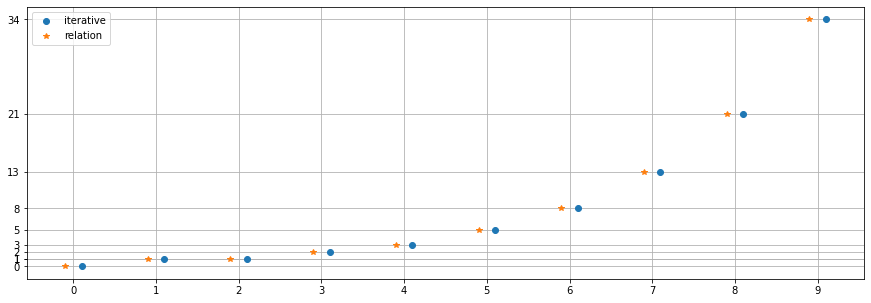

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def fibonacci_iterative(n:int)->set:
    fibs = np.empty(n);    
    fibs[0] = 0;
    fibs[1] = 1;

    for i in range(2, n):
        fibs[i] = fibs[i-1] + fibs[i-2];
    
    return fibs;


def fibonacci_relation(n:int)->set:
    fibs = np.arange(0, n, 1)    
    alpha = (1-np.sqrt(5))/2
    beta  = (1+np.sqrt(5))/2
    # I should vectorize this...
    for i in range(n):
        fibs[i] = ( beta**(i) - alpha**(i) )/np.sqrt(5)
    
    return fibs

n = 10 # <-- CHANGE THIS, number of points

x = np.arange(0, n, 1)
yi = fibonacci_iterative(n)
yr = fibonacci_relation(n)


fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(x+0.1, yi, lw=0, marker='o', label="iterative")
ax.plot(x-0.1, yr, lw=0, marker='*', label="relation")
ax.set_xticks(x)
ax.set_yticks(yr)
ax.grid()
ax.legend()
#ax.semilogy() # <-- UNCOMMENT THIS, Log scale on y 

print("Values obtained with the relation:\n", yr)
print("\nValues obtained from scratch with the iterative procedure:\n", yi)

it is possible to notice how the formula correctly reproduces the expected values and, if one sets a semilog scale on y, that it shows the reason for the exponential behaviour at high values of n. For high values of $n$ the formula tends to be of the form
\begin{align*}
    \lim_{n\rightarrow \infty} \frac{1}{\sqrt{5}} \left[ \beta^{n+1} - \alpha^{n+1} \right] U[n] \simeq \frac{\beta^{n+1}}{\sqrt{5}}
\end{align*}

## Basic properties of LTI systems in the z-space (domain)

### a) Reality
\begin{align*}
    \left. \begin{array}{cr}
        x(z) =\sum_{n} x[n]z^{-n} \\
        x^*(z) =\sum_{n} x^*[n](z^*)^{-n} \\
        x^*(z^*) =\sum_{n} x^*[n]z^{-n}
    \end{array}\right\} \text{ if } x[n]\in \mathcal{R} \implies x^{*}(z^{*})=x(z)
\end{align*}

That is, the transfer function of a real system must have an even number of poles symmetric with respect to the real axis.  
Is the inverse true?
\begin{align*}
    \sum_{n} (x^*[n]-x[n])z^{-n}=0 \implies x^*(z^*)-x(z)=0 \iff x^*[n]=x[n]
\end{align*}

### b) BIBO stability
Assume a BIBO stable sequence (that is $\sum_{n} \left| x[n]\right| < \infty$). In general it is possible to write

\begin{align*}
    x(z) = \sum_{n} x[n]z^{-n} \text{ with } z\in \text{ROC}.
\end{align*}

If one chooses $\left| z \right| = 1$ then $x(z) = \sum_{n} x[n] < \infty$, therefore, if a system is BIBO stable then the unitary circonference belongs to the ROC ($\Gamma_1 \in \text{ROC}$).
On the other hand, if the z transform exits it is possible to freely insert $\left|z\right|=1$ (that is $z\in\Gamma_1$) and then the system is BIBO stable, at least on $\Gamma_1$.

```{admonition} Theorem
A system is BIBO stable $\iff \Gamma_1 \in$ ROC.
```

### c) Causality (with $x[n]\neq \alpha \delta[n]$)
A system is _CAUSAL_ if and only if $0 \not \in $ ROC while $\infty \subset $ ROC.  
**proof**  
- $\implies$ as $x(z)=\sum_{n=0}^{\infty} x[n]z^{-n}$ the condition $0\not \in \text{ROC}$ is necessary to avoid the pole $\left. z^{-n}\right|_{z=0}$. $\infty$ can be seen to be in the ROC by taking the limit.  
- $\impliedby$ it is possible to Laurent expand the transform
\begin{align*}
    x(z)=\sum_{k=-\infty}^{0}\frac{a_k}{k!}z^k = \sum_{n=\infty}^{0}\frac{a_{-n}}{(-n)!}z^{-n}=\sum_{n=0}^{\infty}\frac{a_{-n}}{(-n)!}z^{-n}
\end{align*}
and obtain the z-transform with $0\not \in$ ROC. Notice how in the last step the commutative property of the sum was exploited.


### d) Non Causality (with $x[n]\neq \alpha \delta[n]$)
A system is _NON CAUSAL_ if and only iff $0\in $ ROC while $\infty \not \subset $ ROC.  
**proof**  
$\implies x(z)=\sum_{n=-\infty}^{0} x[n]z^{-n} \implies 0\in \text{ROC;} \quad \infty \not \in \text{ROC}$.  
$\impliedby$ Taylor expand the z-transform ($x(z)=\sum_{k=0}^{\infty} a_k z^{k}=\sum_{n=-\infty}^{0} x_{-n}z^{-n}$) and evaluate ROC.

### e) Both causality and non causality (with $x[n]=\alpha \delta[n]$)
A system is _both_ causal and not causal if and only if $0\in$ROC and $\infty\subset$ROC.

In chronological order, the next lectures are Laboratory Classes 1-3, namely:
- Introduction to Verilog programming on an FPGA device. Counters and frequency dividers.
- Multiplexers and demultiplexers
- Synchronous counters. Toggle flip-flops. Monostable multivibrators.